<a href="https://colab.research.google.com/github/tripathishubham1/Travel-Hostel-Startup---Market-Segmentation/blob/main/Colab%20Files/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('/content/Complete_Dataset.csv')
hotels_df = pd.read_csv('/content/Hotels.csv')
df

,State,Circle,Name of the Monument,Airport,Railway,Domestic - 2016-17,Foreign - 2016-17,Domestic - 2017-18,Foreign - 2017-18,Domestic Percentage growth - 2017-18/2016-17,Foreign Percentage growth - 2017-18/2016-17
0,Uttar Pradesh,Agra Circle,Taj Mahal,12.0,7,5419608,668403,5663136,794556,4.5,18.9
1,Uttar Pradesh,Agra Circle,Agra Fort,11.0,5,1799953,441326,2008208,489822,11.6,11.0
2,Uttar Pradesh,Agra Circle,Akbar's Tomb Sikandara,13.0,12,418502,22389,362070,23638,-13.5,5.6
3,Uttar Pradesh,Agra Circle,Fatehpur Sikri,35.0,37,427854,126114,962069,301181,124.9,138.8
4,Uttar Pradesh,Agra Circle,Itimad-ud-Daulah,15.0,9,108392,129177,138524,76572,27.8,-40.7
...,...,...,...,...,...,...,...,...,...,...,...
111,Gujarat,Vadodara Circle,Sun Temple Modhera,94.0,29,332237,3339,293019,5062,-11.8,51.6
112,Gujarat,Vadodara Circle,Rani-ki-Vav Patan,123.0,4,299893,3586,427305,5836,42.5,62.7
113,Gujarat,Vadodara Circle,Jama Masjid Saherki Masjid Champaner- Pavagadh,43.0,7,143888,1981,112384,3333,-21.9,68.2
114,Gujarat,Vadodara Circle,Buddhist Caves Junagadh,104.0,1,30122,795,40918,1241,35.8,56.1


In [29]:
def kmeans_clustering(dataset):
  num_data = df.select_dtypes(exclude='object').columns.tolist()
  cat_data = df.select_dtypes(include='object').columns.tolist()

  print(num_data)
  print(cat_data)



  from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer,RobustScaler

  pt=PowerTransformer()


  features = ["Domestic - 2016-17", "Foreign - 2016-17"]

  X_subset = df[features] 
  scaler = PowerTransformer().fit(X_subset)
  X = scaler.transform(X_subset)
  pd.DataFrame(X, columns=X_subset.columns).describe()




  from sklearn.cluster import KMeans
  wcss = []  # Within-Cluster-Sum-of-Squares
  for i in range(1, 15):
      kmeans = KMeans(n_clusters=i, init='k-means++', random_state=10)
      kmeans.fit(X)
      wcss.append(kmeans.inertia_)

  plt.figure(figsize=(20, 8))
  plt.plot(range(1, 15), wcss)
  plt.title('The Elbow Point Graph')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')
  plt.plot(range(1, 15), wcss, "-o")
  plt.xticks(range(1, 15))
  plt.grid(True)
  plt.show()


  from sklearn.cluster import KMeans
  wcss = [] 
  cl=50
  corte = 0.1
  anterior = 100000000000000
  cost = []
  K_best = cl

  for k in range(1,cl+1):
      model = KMeans(n_clusters=k, init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=10)
      model=model.fit(X)
      labels=model.labels_
      interia=model.inertia_
      if (K_best == cl) and (((anterior - interia)/anterior) < corte):
          K_best = k - 1
      cost.append(interia)
      anterior = interia

  plt.figure(figsize=(8, 6))
  plt.scatter(range(1, cl+1), cost, c='red')
  plt.show()

  print('The best K sugest: ', K_best)
  model = KMeans(n_clusters=K_best, init='k-means++', n_init=10,
                max_iter=300, tol=1e-04, random_state=101)

  model = model.fit(X)
  labels = model.labels_

  fig = plt.figure(figsize=(20, 5))
  ax = fig.add_subplot(121)
  plt.scatter(x=X[:, 1], y=X[:, 0], c=model.labels_.astype(float))



  from sklearn.metrics import silhouette_samples, silhouette_score
  import matplotlib.cm as cm



  cluster_centers = dict()
  K_best=6
  for n_clusters in range(3,K_best):
      fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
      fig.set_size_inches(25, 7)
      ax1.set_xlim([-0.1, 1])
      ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

      clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=10)
      cluster_labels = clusterer.fit_predict(X)

      silhouette_avg = silhouette_score(X = X, labels = cluster_labels)
      cluster_centers.update({n_clusters :{'cluster_center':clusterer.cluster_centers_,
                                          'silhouette_score':silhouette_avg,
                                          'labels':cluster_labels}
                            })

      sample_silhouette_values = silhouette_samples(X = X, labels = cluster_labels)
      y_lower = 10
      for i in range(n_clusters):
          ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

          ith_cluster_silhouette_values.sort()

          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = cm.Spectral(float(i) / n_clusters)
          ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

          ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
          y_lower = y_upper + 10  # 10 for the 0 samples

      ax1.set_title("The silhouette plot for the various clusters")
      ax1.set_xlabel("The silhouette coefficient values")
      ax1.set_ylabel("Cluster label")
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
      ax1.set_yticks([])
      ax1.set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
      colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
      
      centers = clusterer.cluster_centers_
      y = 0
      x = 1
      ax2.scatter(X[:, x], X[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
      ax2.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
      for i, c in enumerate(centers):
          ax2.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
      ax2.set_title("{} Clustered data".format(n_clusters))
      

      x = 1
      ax3.scatter(X[:, x], X[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
      ax3.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
      for i, c in enumerate(centers):
          ax3.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
      ax3.set_title("Silhouette score: {:1.2f}".format(cluster_centers[n_clusters]['silhouette_score']))
      
      plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                  fontsize=14, fontweight='bold')
      plt.show()



  for i in range(3, K_best+1, 2):
      print("for {} clusters the silhouette score is {:1.3f}".format(
          i, cluster_centers[i]['silhouette_score']))
      print("Centers of each cluster:")
      cent_transformed = scaler.inverse_transform(
          cluster_centers[i]['cluster_center'])
      print(pd.DataFrame(cent_transformed, columns=features))
      print('-'*50)




  df['clusters_3'] = cluster_centers[3]['labels']
  df['clusters_4'] = cluster_centers[4]['labels']

  df['clusters_5'] = cluster_centers[5]['labels']
  display(df.head())

  fig = plt.figure(figsize=(20, 7))
  f1 = fig.add_subplot(131)
  market = df.clusters_3.value_counts()
  g = plt.pie(market, labels=market.index,
              autopct='%1.1f%%', shadow=True, startangle=90)
  plt.title('3 Clusters')


  f1 = fig.add_subplot(132)
  market = df.clusters_4.value_counts()
  g = plt.pie(market, labels=market.index,
              autopct='%1.1f%%', shadow=True, startangle=90)        
  plt.title('4 Clusters')


  f1 = fig.add_subplot(133)
  market = df.clusters_5.value_counts()
  g = plt.pie(market, labels=market.index,
              autopct='%1.1f%%', shadow=True, startangle=90)
  plt.title('5 Clusters')
  plt.show()



  market = df.clusters_4.value_counts()
  g = plt.pie(market, labels=market.index,
              autopct='%1.1f%%', shadow=True, startangle=90)
  plt.title('4 Clusters')



  clusterer = KMeans(n_clusters=4,init='k-means++',random_state=10).fit(X)
  centers = clusterer.cluster_centers_
  c_preds = clusterer.predict(X)
  print(centers)

  print(c_preds[0:100])

  import matplotlib
  fig = plt.figure(figsize=(8, 8))
  colors = ['orange', 'blue', 'purple', 'green']
  colored = [colors[k] for k in c_preds]
  print(colored[0:10])
  plt.scatter(X[:, 0], X[:, 1], color=colored)
  for ci, c in enumerate(centers):
      plt.plot(c[0], c[1], 'o', markersize=8,
              color='red', alpha=0.9, label=''+str(ci))

  plt.xlabel('Domestic')
  plt.ylabel('Foreign')
  plt.legend()
  plt.show()



  len(df['Circle'].unique())



  df.Circle.value_counts()[0:10]



  data=pd.DataFrame()

  data['Circle']=df.Circle.copy()
  data=pd.get_dummies(data,columns=['Circle'])


  data.insert(0,'Circle',df['Circle'])



  data



  clust_prod = data.copy()
  clust_prod['cluster'] = c_preds

  clust_prod.head(10)



  c0 = clust_prod[clust_prod['cluster'] == 0].drop('cluster', axis=1).mean()
  print(c0.sort_values(ascending=False)[0:10])


  c1 = clust_prod[clust_prod['cluster'] == 1].drop('cluster', axis=1).mean()
  print(c1.sort_values(ascending=False)[0:10])


  c2 = clust_prod[clust_prod['cluster'] == 2].drop('cluster', axis=1).mean()
  print(c2.sort_values(ascending=False)[0:10])


  c3 = clust_prod[clust_prod['cluster'] == 3].drop('cluster', axis=1).mean()
  print(c3.sort_values(ascending=False)[0:10])

In [32]:
features_16_17 = ["Domestic - 2016-17", "Foreign - 2016-17"]
features_17_18 = ["Domestic - 2017-18", "Foreign - 2017-18"]
X_16_17 = df[features_16_17]
X_17_18 = df[features_17_18]

['Airport', 'Railway', 'Domestic - 2016-17', 'Foreign - 2016-17', 'Domestic - 2017-18', 'Foreign - 2017-18', 'Domestic Percentage growth - 2017-18/2016-17', 'Foreign Percentage growth - 2017-18/2016-17']
['State', 'Circle', 'Name of the Monument']


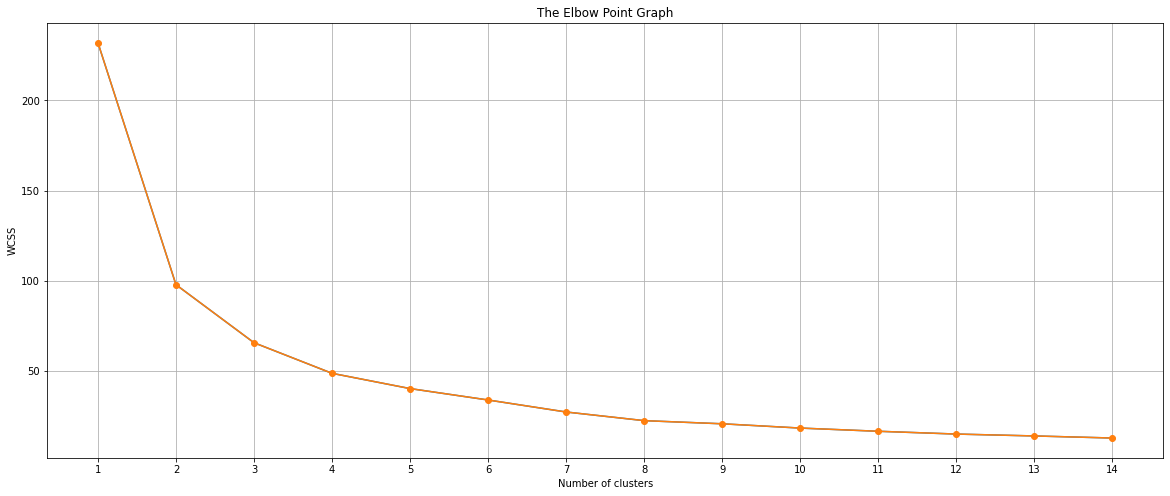

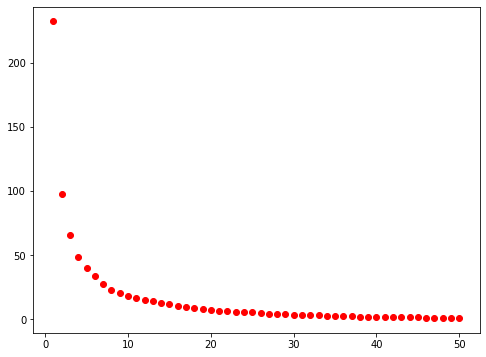

The best K sugest:  8


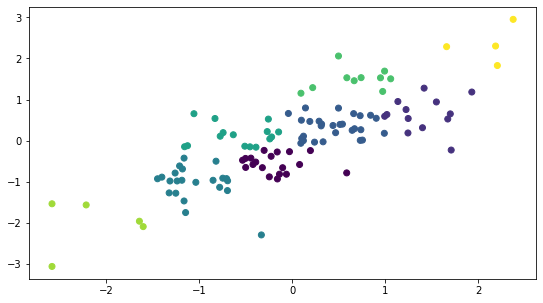

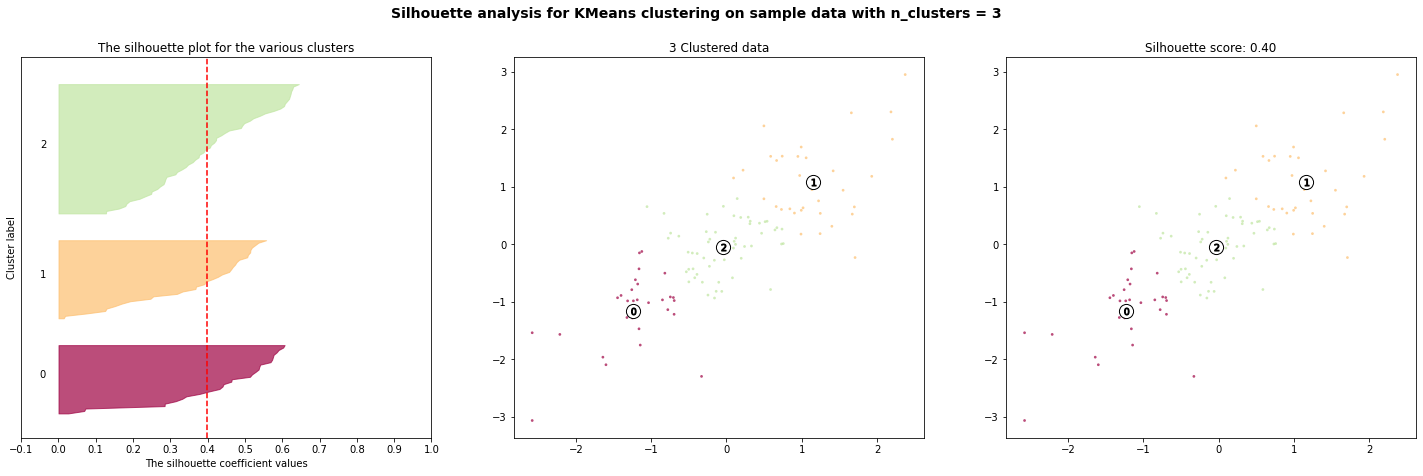

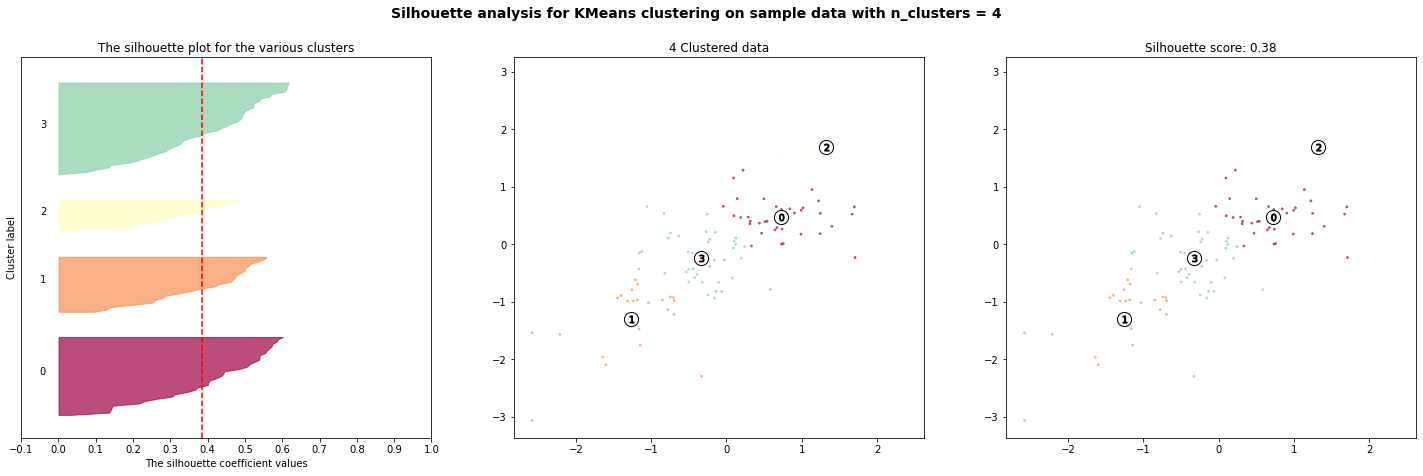

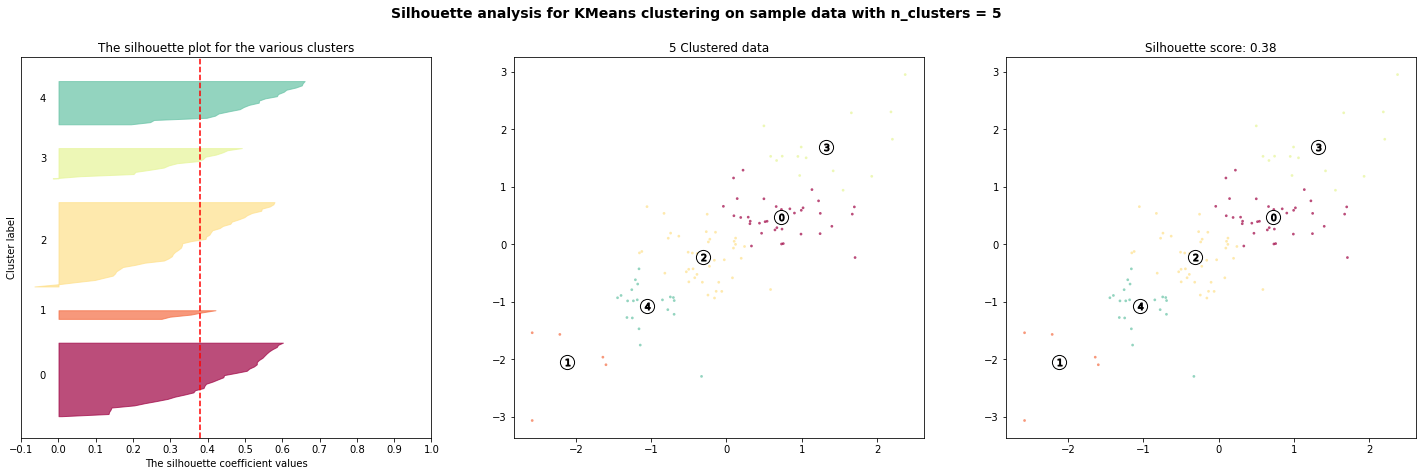

for 3 clusters the silhouette score is 0.399
Centers of each cluster:
   Domestic - 2016-17  Foreign - 2016-17
0        15987.772147          50.174217
1       765044.575855       31723.741933
2       148444.343790        1371.398608
--------------------------------------------------
for 5 clusters the silhouette score is 0.380
Centers of each cluster:
   Domestic - 2016-17  Foreign - 2016-17
0        3.325696e+05       10530.724564
1        1.024494e+03           2.916819
2        1.089550e+05         657.777064
3        1.539438e+06       48382.004520
4        1.956705e+04          84.687637
--------------------------------------------------


,State,Circle,Name of the Monument,Airport,Railway,Domestic - 2016-17,Foreign - 2016-17,Domestic - 2017-18,Foreign - 2017-18,Domestic Percentage growth - 2017-18/2016-17,Foreign Percentage growth - 2017-18/2016-17,clusters_3,clusters_4,clusters_5
0,Uttar Pradesh,Agra Circle,Taj Mahal,12.0,7,5419608,668403,5663136,794556,4.5,18.9,1,2,3
1,Uttar Pradesh,Agra Circle,Agra Fort,11.0,5,1799953,441326,2008208,489822,11.6,11.0,1,2,3
2,Uttar Pradesh,Agra Circle,Akbar's Tomb Sikandara,13.0,12,418502,22389,362070,23638,-13.5,5.6,1,0,0
3,Uttar Pradesh,Agra Circle,Fatehpur Sikri,35.0,37,427854,126114,962069,301181,124.9,138.8,1,0,0
4,Uttar Pradesh,Agra Circle,Itimad-ud-Daulah,15.0,9,108392,129177,138524,76572,27.8,-40.7,1,0,0


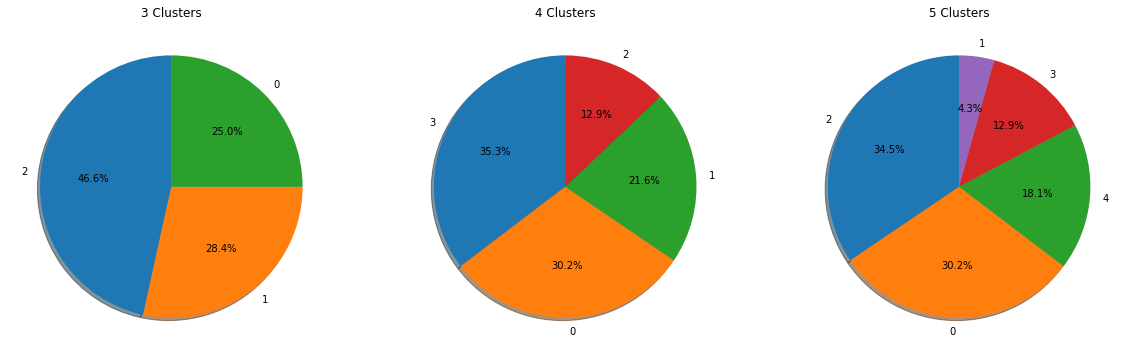

[[ 0.47302478  0.72708835]
 [-1.29246485 -1.26094934]
 [ 1.68524636  1.31977539]
 [-0.23226686 -0.33465828]]
[2 2 0 0 0 0 3 1 2 2 0 0 3 3 2 0 0 0 0 0 0 0 0 3 3 1 2 0 3 3 1 1 3 1 2 3 3
 1 1 1 1 2 2 2 2 0 3 3 3 1 1 0 0 0 0 3 1 3 3 3 1 1 0 1 2 2 1 3 3 1 3 3 3 0
 0 0 3 3 3 0 3 0 1 3 2 0 3 0 3 3 0 3 3 1 0 3 0 3 3 1]
['purple', 'purple', 'orange', 'orange', 'orange', 'orange', 'green', 'blue', 'purple', 'purple']


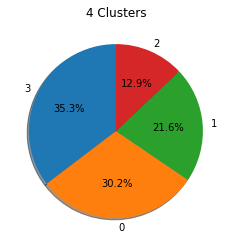

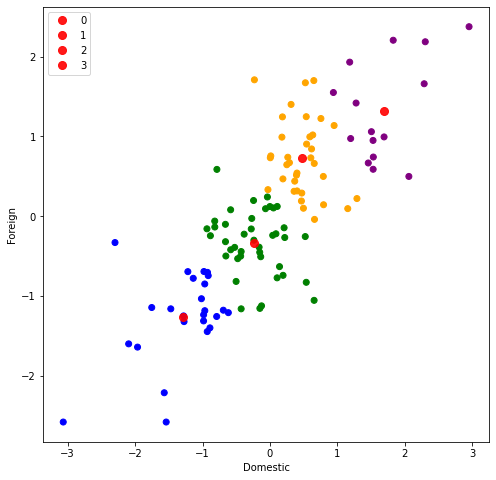

Circle_Bhopal Circle        0.142857
Circle_Agra Circle          0.114286
Circle_Dharwad Circle       0.114286
Circle_Bengaluru Circle     0.085714
Circle_Mumbai Circle        0.085714
Circle_Lucknow Circle       0.057143
Circle_Aurangabad Circle    0.057143
Circle_Jodhpur Circle       0.057143
Circle_Vadodara Circle      0.057143
Circle_Patna Circle         0.057143
dtype: float64
Circle_Chennai Circle        0.16
Circle_Srinagar Circle       0.12
Circle_Hyderabad Circle      0.08
Circle_Bhubaneswar Circle    0.08
Circle_Delhi Circle          0.08
Circle_Guwahati Circle       0.08
Circle_Vadodara Circle       0.04
Circle_Bhopal Circle         0.04
Circle_Chandigarh Circle     0.04
Circle_Dharwad Circle        0.04
dtype: float64
Circle_Delhi Circle          0.266667
Circle_Agra Circle           0.133333
Circle_Aurangabad Circle     0.133333
Circle_Hyderabad Circle      0.133333
Circle_Bengaluru Circle      0.066667
Circle_Sarnath Circle        0.066667
Circle_Bhubaneswar Circle    0.0

In [30]:
kmeans_clustering(X_16_17)

['Airport', 'Railway', 'Domestic - 2016-17', 'Foreign - 2016-17', 'Domestic - 2017-18', 'Foreign - 2017-18', 'Domestic Percentage growth - 2017-18/2016-17', 'Foreign Percentage growth - 2017-18/2016-17', 'clusters_3', 'clusters_4', 'clusters_5']
['State', 'Circle', 'Name of the Monument']


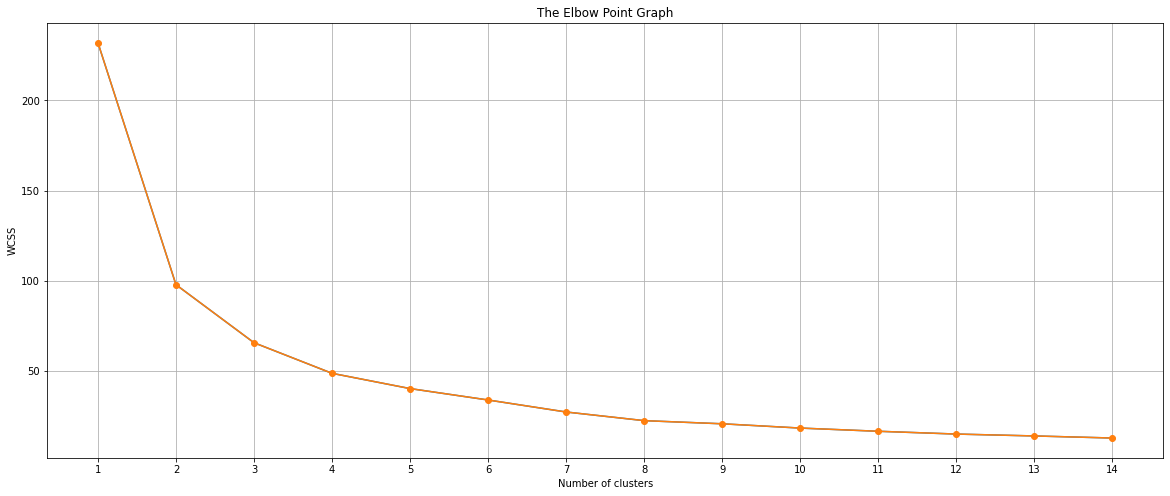

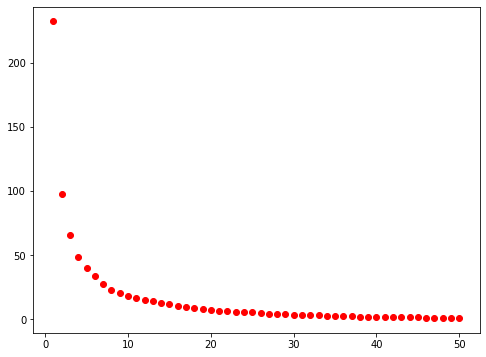

The best K sugest:  8


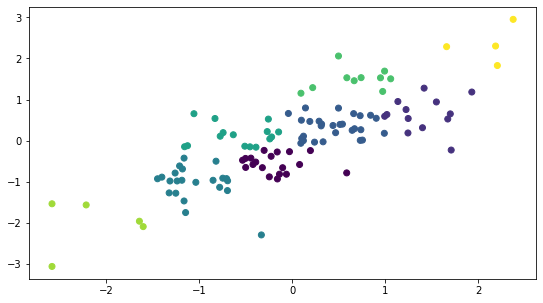

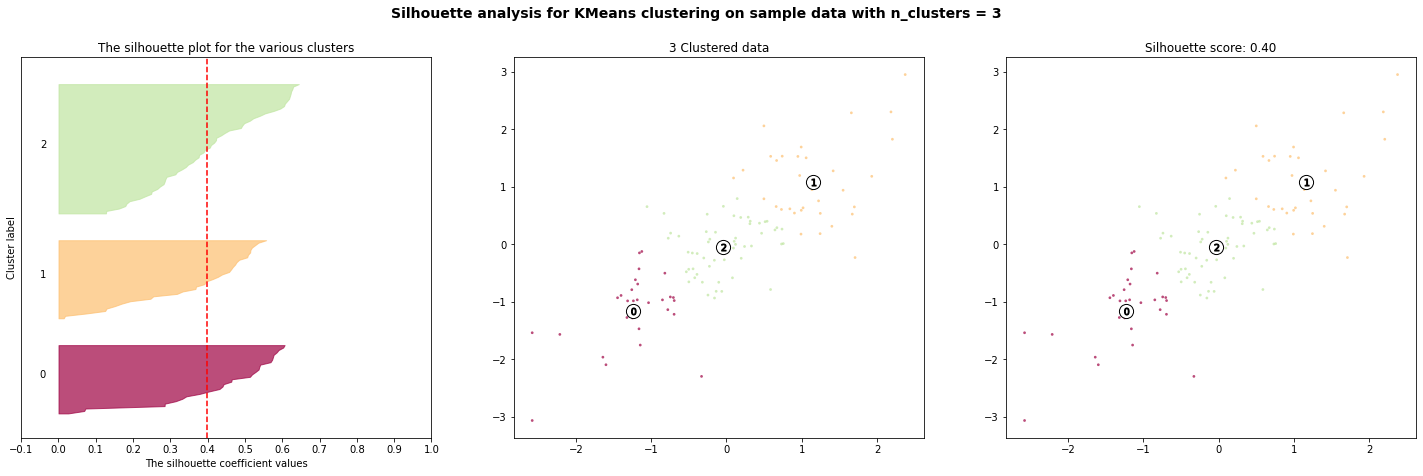

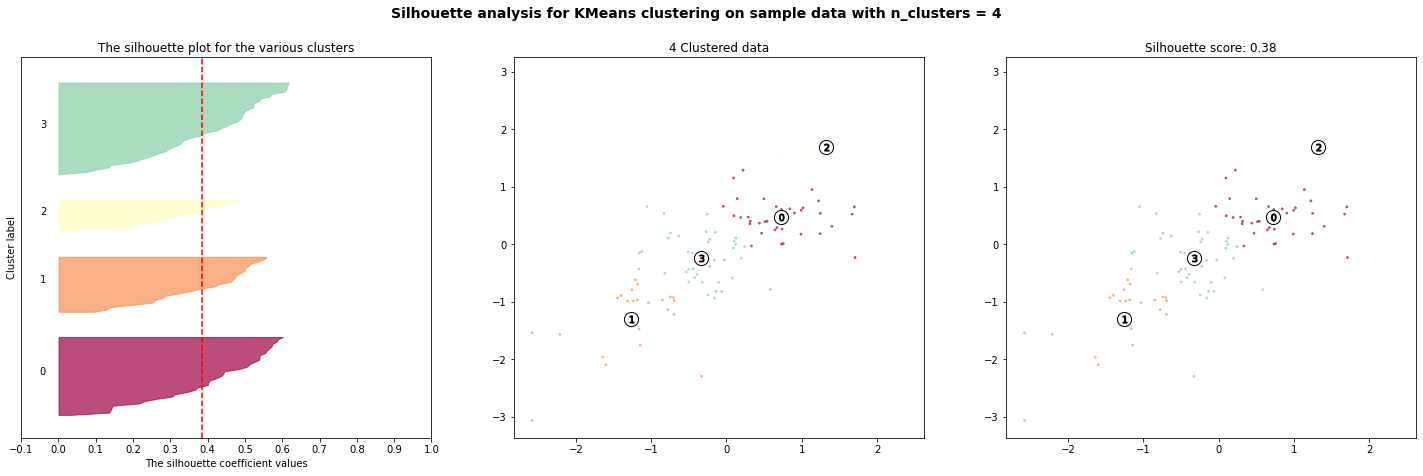

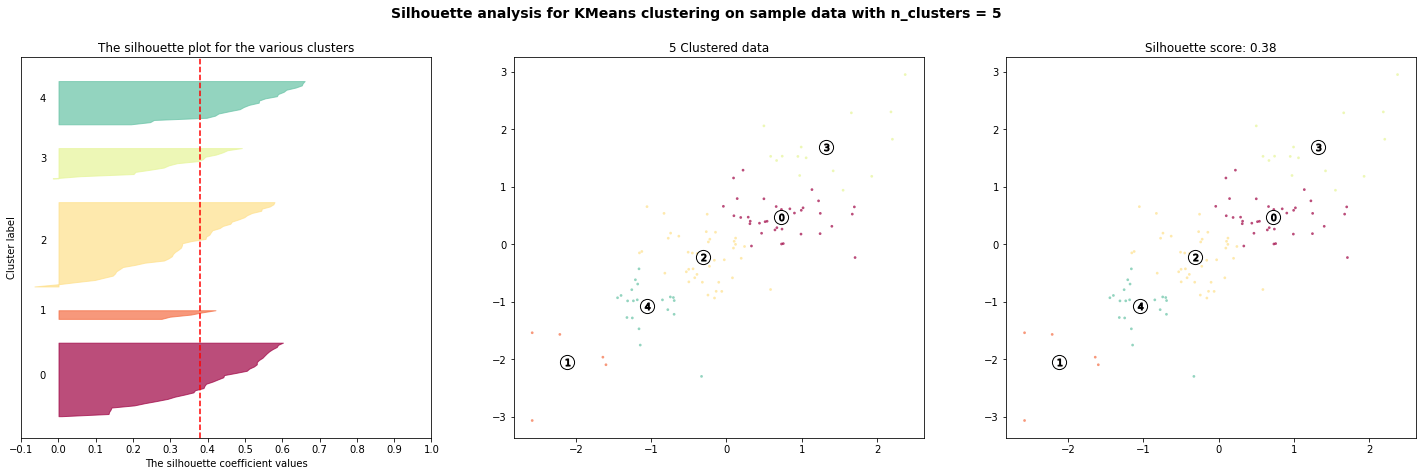

for 3 clusters the silhouette score is 0.399
Centers of each cluster:
   Domestic - 2016-17  Foreign - 2016-17
0        15987.772147          50.174217
1       765044.575855       31723.741933
2       148444.343790        1371.398608
--------------------------------------------------
for 5 clusters the silhouette score is 0.380
Centers of each cluster:
   Domestic - 2016-17  Foreign - 2016-17
0        3.325696e+05       10530.724564
1        1.024494e+03           2.916819
2        1.089550e+05         657.777064
3        1.539438e+06       48382.004520
4        1.956705e+04          84.687637
--------------------------------------------------


,State,Circle,Name of the Monument,Airport,Railway,Domestic - 2016-17,Foreign - 2016-17,Domestic - 2017-18,Foreign - 2017-18,Domestic Percentage growth - 2017-18/2016-17,Foreign Percentage growth - 2017-18/2016-17,clusters_3,clusters_4,clusters_5
0,Uttar Pradesh,Agra Circle,Taj Mahal,12.0,7,5419608,668403,5663136,794556,4.5,18.9,1,2,3
1,Uttar Pradesh,Agra Circle,Agra Fort,11.0,5,1799953,441326,2008208,489822,11.6,11.0,1,2,3
2,Uttar Pradesh,Agra Circle,Akbar's Tomb Sikandara,13.0,12,418502,22389,362070,23638,-13.5,5.6,1,0,0
3,Uttar Pradesh,Agra Circle,Fatehpur Sikri,35.0,37,427854,126114,962069,301181,124.9,138.8,1,0,0
4,Uttar Pradesh,Agra Circle,Itimad-ud-Daulah,15.0,9,108392,129177,138524,76572,27.8,-40.7,1,0,0


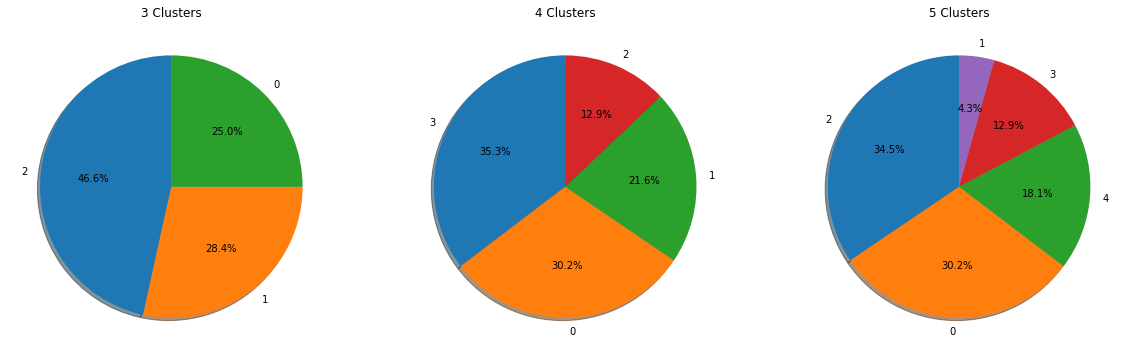

[[ 0.47302478  0.72708835]
 [-1.29246485 -1.26094934]
 [ 1.68524636  1.31977539]
 [-0.23226686 -0.33465828]]
[2 2 0 0 0 0 3 1 2 2 0 0 3 3 2 0 0 0 0 0 0 0 0 3 3 1 2 0 3 3 1 1 3 1 2 3 3
 1 1 1 1 2 2 2 2 0 3 3 3 1 1 0 0 0 0 3 1 3 3 3 1 1 0 1 2 2 1 3 3 1 3 3 3 0
 0 0 3 3 3 0 3 0 1 3 2 0 3 0 3 3 0 3 3 1 0 3 0 3 3 1]
['purple', 'purple', 'orange', 'orange', 'orange', 'orange', 'green', 'blue', 'purple', 'purple']


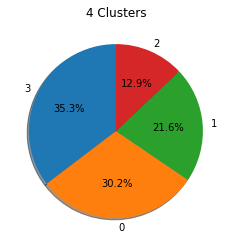

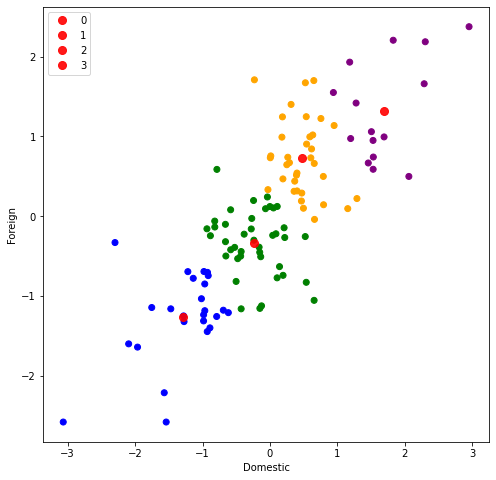

Circle_Bhopal Circle        0.142857
Circle_Agra Circle          0.114286
Circle_Dharwad Circle       0.114286
Circle_Bengaluru Circle     0.085714
Circle_Mumbai Circle        0.085714
Circle_Lucknow Circle       0.057143
Circle_Aurangabad Circle    0.057143
Circle_Jodhpur Circle       0.057143
Circle_Vadodara Circle      0.057143
Circle_Patna Circle         0.057143
dtype: float64
Circle_Chennai Circle        0.16
Circle_Srinagar Circle       0.12
Circle_Hyderabad Circle      0.08
Circle_Bhubaneswar Circle    0.08
Circle_Delhi Circle          0.08
Circle_Guwahati Circle       0.08
Circle_Vadodara Circle       0.04
Circle_Bhopal Circle         0.04
Circle_Chandigarh Circle     0.04
Circle_Dharwad Circle        0.04
dtype: float64
Circle_Delhi Circle          0.266667
Circle_Agra Circle           0.133333
Circle_Aurangabad Circle     0.133333
Circle_Hyderabad Circle      0.133333
Circle_Bengaluru Circle      0.066667
Circle_Sarnath Circle        0.066667
Circle_Bhubaneswar Circle    0.0

In [33]:
kmeans_clustering(X_17_18)
